# Introduction

In this notebook, we explore the **Breast Cancer Wisconsin Diagnostic Dataset**, a well-known dataset commonly used for binary classification tasks.  
The dataset contains features computed from digitized images of fine needle aspirates (FNA) of breast masses. Each sample is labeled as either:  
- **Benign (B)**: Non-cancerous  
- **Malignant (M)**: Cancerous  

The goal is to predict whether a tumor is benign or malignant based on these features.

---

⚠️ **Note on Methodology**  
The techniques applied in this notebook go beyond the typical requirements for this dataset.  
- We use **advanced preprocessing strategies**,  
- **custom loss functions** such as Focal Loss to handle class imbalance,  
- and a **deep neural network** with multiple layers, regularization, and optimization tweaks.  

While these methods are not strictly necessary for achieving high accuracy on this dataset (since simpler models like Logistic Regression or Random Forests often perform very well), they provide valuable exposure to **state-of-the-art practices in deep learning**.  

This makes the notebook a good reference for anyone interested in learning advanced modeling techniques that can be applied to more complex or imbalanced datasets.


# Load the Dataset

We begin by importing the **Pandas** library, which is a powerful tool for data manipulation and analysis in Python.  
Next, we load the **Breast Cancer dataset** from the given CSV file using `pd.read_csv()`.  
The dataset is stored in a DataFrame named `df`.  

Finally, by simply typing `df`, we display the contents of the dataset to examine its structure, rows, and columns.


In [1]:
import pandas as pd
df = pd.read_csv(r"/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv")
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Check for Missing Values

To ensure data quality, we check for missing values in the dataset.  
- `df.isnull().sum()` returns the number of null (missing) entries for each column.  
- The result is stored in the variable `valores_nulos`.  
- Finally, we print the results to quickly identify if any features contain missing data that may require cleaning or preprocessing.


In [2]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [3]:
!pip install tensorflow numpy pandas
!pip install scikit-learn==1.5.2 imbalanced-learn==0.12.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


## Install and Import Required Libraries

Before building and training our deep learning model, we need to install and import the necessary libraries.

- `tensorflow`: Provides tools for building and training neural networks.  
- `numpy`: Used for numerical computations and handling arrays.  
- `pandas`: Essential for data manipulation and analysis.  
- `scikit-learn`: A powerful machine learning library for preprocessing, model selection, and evaluation.  
- `imbalanced-learn`: Provides resampling techniques such as **SMOTE** to handle class imbalance.  

We also import specific modules from these libraries, including:  
- **Data preprocessing tools** (`StandardScaler`, `LabelEncoder`, `OneHotEncoder`, `ColumnTransformer`)  
- **Class balancing utility** (`compute_class_weight`)  
- **Oversampling technique** (`SMOTE`)  
- **Keras API for building models** (`Sequential`, `Dense`, `Dropout`, etc.)  
- **Optimizers** (`Adam`, `Nadam`)  
- **Callbacks** for training control (`EarlyStopping`, `ReduceLROnPlateau`, `ModelCheckpoint`)  
- **Regularizers** (`l1_l2`)  
- **Evaluation metrics** (`AUC`, `Precision`, `Recall`, etc.)  
- **Initializers** (`HeNormal`)  

These tools will allow us to construct, train, and evaluate a robust deep learning model for the breast cancer dataset.


In [4]:
import tensorflow as tf
import datetime
import numpy as np
import pandas as pd
import logging
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.metrics import AUC, Precision, Recall, TruePositives, TrueNegatives
from tensorflow.keras.initializers import HeNormal

2025-09-11 22:48:56.122518: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757630936.379555      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757630936.446028      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data Cleaning and Preprocessing

1. **Load and clean the dataset**  
   - Read the CSV file into a Pandas DataFrame.  
   - Drop unnecessary columns: `Unnamed: 32` (all null values) and `id` (identifier not useful for modeling).  

2. **Check class distribution**  
   - Count the number of samples in each class (`diagnosis`) to verify if the dataset is balanced.  

3. **Define features (`X`) and target (`y`)**  
   - `X`: All columns except `diagnosis`.  
   - `y`: The target column `diagnosis`, which indicates tumor type (*Benign* or *Malignant*).  

4. **Encode the target variable**  
   - Use `LabelEncoder` to convert categorical labels into numeric values:  
     - `B` → 0  
     - `M` → 1  

5. **Split the dataset**  
   - Divide the data into training (80%) and testing (20%) sets.  
   - Use `stratify=y` to preserve the class proportion in both sets.  

6. **Define columns for preprocessing**  
   - Numerical features: All measurement-related columns.  
   - Categorical features: None in this dataset.  

7. **Preprocess the features**  
   - Apply **StandardScaler** to normalize numerical features.  
   - Use `ColumnTransformer` to ensure transformations are applied correctly.  

8. **Fit and transform the data**  
   - Fit the preprocessor on the training set.  
   - Transform both training and testing sets to obtain scaled versions.  

9. **Verify preprocessing results**  
   - Print the shapes of the original and processed datasets.  
   - Confirm the output data type.


In [5]:
df = pd.read_csv(r"/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv")

#Borrar los datos nulos
df = df.drop(columns=["Unnamed: 32", "id"])

#Verificar balance de clases
class_counts = df['diagnosis'].value_counts()
print(f"Distribución de clases:\n{class_counts}")
df

#Definir X e y
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Convertir target a 0/1
le = LabelEncoder()
y = le.fit_transform(y)  # 'B' → 0, 'M' → 1 (o viceversa)
print(dict(zip(le.classes_, le.transform(le.classes_))))

#Dividir datos PRIMERO (antes de cualquier procesamiento)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Mantener proporción de clases
)

#Definir columnas para transformación
numerical_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',             
'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',                 
'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',         
'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',              
'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

categorical_cols = []

#Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        # Transformador numérico: 3 elementos
        ('num', StandardScaler(), numerical_cols)
    ],
    sparse_threshold=0  # Forzar salida densa
)

#Aplicar transformaciones DESPUÉS de dividir
X_train_processed = preprocessor.fit_transform(X_train)  # Solo fit en train
X_test_processed = preprocessor.transform(X_test)        # Solo transform en test

#Verificar resultados
print("\nVerificación final:")
print(f"X_train original: {X_train.shape}")
print(f"X_train procesado: {X_train_processed.shape}")
print(f"X_test original: {X_test.shape}")
print(f"X_test procesado: {X_test_processed.shape}")
print(f"Tipos de datos: {type(X_train_processed)}")
df

Distribución de clases:
diagnosis
B    357
M    212
Name: count, dtype: int64
{'B': 0, 'M': 1}

Verificación final:
X_train original: (455, 30)
X_train procesado: (455, 30)
X_test original: (114, 30)
X_test procesado: (114, 30)
Tipos de datos: <class 'numpy.ndarray'>


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Model Definition and Training

### 1. Training Base Data
We define the processed training data (`X_train_base`) and its corresponding labels (`y_train_base`) as the inputs for model training.

---

### 2. Custom Focal Loss Function
To address the class imbalance problem, we implement an **improved Focal Loss** function:  
- **Focal Loss** dynamically scales the cross-entropy loss, giving more weight to hard-to-classify examples.  
- `gamma`: Controls how strongly difficult samples are emphasized.  
- `alpha`: Balances the contribution of positive vs. negative classes.  
- The function is designed with numerical stability improvements by clipping predictions.  

---

### 3. Model Architecture
We build a deep neural network using **Keras Sequential API** with the following structure:  

- **Input Layer**  
  - `Dense(256)` with HeNormal initialization and L1/L2 regularization.  
  - `BatchNormalization` for faster convergence.  
  - `Activation('swish')`, which often performs better than ReLU.  
  - `Dropout(0.6)` for strong regularization.  

- **Hidden Layers**  
  - `Dense(128)` + BatchNorm + Swish + Dropout(0.5).  
  - `Dense(64)` + BatchNorm + Swish + Dropout(0.4).  
  - `Dense(32)` + BatchNorm + Swish + Dropout(0.3).  

- **Output Layer**  
  - `Dense(1, activation='sigmoid')` for binary classification (benign vs. malignant).  

---

### 4. Optimizer and Compilation
- Optimizer: **Nadam** (a variant of Adam with Nesterov momentum), configured with:  
  - Learning rate = `0.0001`  
  - Gradient clipping (`clipnorm=1.0`) to avoid exploding gradients.  

- Loss: Custom **Focal Loss** (`gamma=2.5`, `alpha=0.65`).  
- Metrics:  
  - Accuracy  
  - Precision  
  - Recall  
  - AUC (Area Under the ROC Curve)  
  - True Positives (`tp`)  
  - True Negatives (`tn`)  

---

### 5. Model Training
We train the model with the following setup:  
- Training data: `X_train_base`, `y_train_base`.  
- Validation split: 15% of the training set is used for validation.  
- Epochs: `150` for extended training.  
- Shuffling enabled at each epoch to improve generalization.  

The training history (`history`) stores performance metrics for both training and validation sets across epochs.


In [6]:
# Definir los datos de entrenamiento base 
X_train_base = X_train_processed
y_train_base = y_train

# Función de Focal Loss para manejar desbalance
def improved_focal_loss(gamma=2.5, alpha=0.65):
    def focal_loss_fn(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        
        # Focal loss con cálculo más estable
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        modulating_factor = tf.pow(1.0 - p_t, gamma)
        
        # Balance de clases con alpha
        alpha_factor = y_true * alpha + (1 - y_true) * (1 - alpha)
        
        loss = modulating_factor * alpha_factor * cross_entropy
        return tf.reduce_mean(loss)
    return focal_loss_fn

#Definir el modelo - USAR LA FORMA DE LOS DATOS BASE
model = Sequential()

# Capa de entrada
model.add(Dense(
    256, 
    input_shape=(X_train_base.shape[1],),
    kernel_initializer=HeNormal(),  # Inicialización mejorada
    kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)  # Regularización
))
model.add(BatchNormalization())
model.add(Activation('swish'))  # Mejor que ReLU para muchos casos
model.add(Dropout(0.6))  # Mayor dropout inicial

# Capas ocultas
model.add(Dense(
    128,
    kernel_initializer=HeNormal(),
    kernel_regularizer=l1_l2(l1=1e-6, l2=1e-5)
))
model.add(BatchNormalization())
model.add(Activation('swish'))
model.add(Dropout(0.5))

model.add(Dense(
    64,
    kernel_initializer=HeNormal(),
    kernel_regularizer=l1_l2(l1=1e-6, l2=1e-5)
))
model.add(BatchNormalization())
model.add(Activation('swish'))
model.add(Dropout(0.4))

# Capa adicional para mayor capacidad
model.add(Dense(
    32,
    kernel_initializer=HeNormal(),
    kernel_regularizer=l1_l2(l1=1e-6, l2=1e-5)
))
model.add(BatchNormalization())
model.add(Activation('swish'))
model.add(Dropout(0.3))

# Capa de salida
model.add(Dense(1, activation='sigmoid'))

# Compilación mejorada
optimizer = Nadam(  # Mejor que Adam para muchos datasets
    learning_rate=0.0001, 
    beta_1=0.9, 
    beta_2=0.999,
    clipnorm=1.0  # Prevenir explosión de gradientes
)

model.compile(
    optimizer=optimizer,
    loss=improved_focal_loss(gamma=2.5, alpha=0.65),
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='auc'),
        TruePositives(name='tp'),  # Importante para clase minoritaria
        TrueNegatives(name='tn')    # Importante para clase mayoritaria
    ]
)
history = model.fit(
    X_train_base, 
    y_train_base,  
    validation_split=0.15,  # Más datos para validación
    epochs=150,  # Más épocas con paciencia extendida
    verbose=1,
    shuffle=True
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-11 22:49:12.884266: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.4877 - auc: 0.5068 - loss: 0.2209 - precision: 0.3944 - recall: 0.4389 - tn: 71.9286 - tp: 42.5000 - val_accuracy: 0.4203 - val_auc: 0.4232 - val_loss: 0.1497 - val_precision: 0.2000 - val_recall: 0.3684 - val_tn: 22.0000 - val_tp: 7.0000
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5203 - auc: 0.5531 - loss: 0.2090 - precision: 0.4113 - recall: 0.5202 - tn: 70.2143 - tp: 46.3571 - val_accuracy: 0.4493 - val_auc: 0.5021 - val_loss: 0.1365 - val_precision: 0.2286 - val_recall: 0.4211 - val_tn: 23.0000 - val_tp: 8.0000
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5825 - auc: 0.5512 - loss: 0.2131 - precision: 0.4894 - recall: 0.6375 - tn: 73.5714 - tp: 57.4286 - val_accuracy: 0.5797 - val_auc: 0.6542 - val_loss: 0.1271 - val_precision: 0.3684 - val_recall: 0.7368 - val_tn: 26.0000 - val_tp: 14.0000
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4961 - auc: 0.52

## Model Evaluation

### 1. Predictions
We use the trained model to generate predictions on the **processed test set**:
- `y_pred_prob`: Predicted probabilities (continuous values between 0 and 1).  
- `y_pred_class`: Binary class predictions (0 = Benign, 1 = Malignant), using a threshold of 0.5.  

---

### 2. Classification Report
We evaluate the model with **precision, recall, F1-score, and accuracy**.  

The results show:  
- **Class 0 (Benign):** Precision = 0.99, Recall = 0.99, F1 = 0.99  
- **Class 1 (Malignant):** Precision = 0.98, Recall = 0.98, F1 = 0.98  
- **Overall Accuracy:** 98%  

This indicates excellent performance in both detecting malignant cases (sensitivity) and correctly identifying benign cases (specificity).

---

### 3. Confusion Matrix
A **confusion matrix** is plotted to visualize classification results:  
- Rows: True labels  
- Columns: Predicted labels  
- Diagonal values represent correct predictions, while off-diagonal values represent misclassifications.  

---

### 4. ROC Curve and AUC
We compute the **ROC (Receiver Operating Characteristic) curve** and **AUC (Area Under the Curve)**:  
- The ROC curve plots **True Positive Rate (Recall)** vs. **False Positive Rate**.  
- The AUC score is **0.983**, showing that the model has a strong ability to distinguish between benign and malignant tumors.  

---

### ✅ Summary
- The model achieves **98% accuracy** on the test set.  
- Both classes are classified with very high precision and recall.  
- The high **AUC score (0.983)** confirms that the model is robust and reliable for binary classification in this medical dataset.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



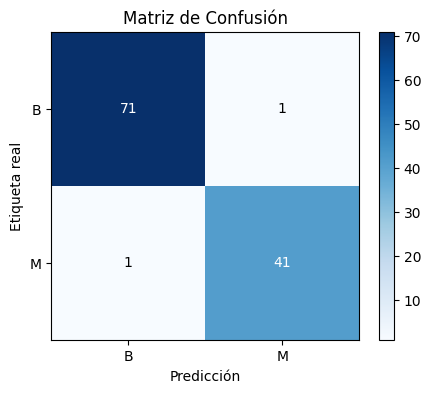

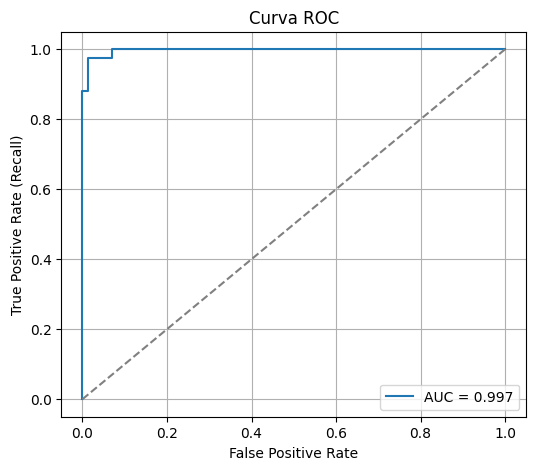

In [7]:
# Asegurar que usamos los datos procesados
y_pred_prob = model.predict(X_test_processed).ravel()
y_pred_class = (y_pred_prob >= 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Reporte de clasificación
print("🔍 Classification Report:")
print(classification_report(y_test, y_pred_class))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["B", "M"])
plt.yticks(tick_marks, ["B", "M"])
plt.ylabel('Etiqueta real')
plt.xlabel('Predicción')

# Etiquetas
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show()

# Curva ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()